# Data Wrangling Project

In [247]:
#importing important Libraries
import pandas as pd
import numpy as np
import requests
import os
import sys
import tweepy
import re
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 1) Gathering Data

### a) Reading Twitter Archive

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced-2.csv', sep=',')

In [19]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### b) Image prediction data

In [3]:
image_predictions = pd.read_csv('image-predictions-3.tsv', sep = '\t')

In [18]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [12]:
twitter_archive.query('tweet_id == "678424312106393600"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1764,678424312106393600,NaN,NaN,2015-12-20 03:58:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Crystal. She's a shitty fireman. No se...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678424312...,2,10,Crystal,None,None,None,None


### c) Twitter API Setup

In [32]:
consumer_key = '*************'
consumer_secret = '****************'
access_token = '*******************'
access_secret = '*****************'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,parser=tweepy.parsers.JSONParser(),
                 wait_on_rate_limit=True,
                 wait_on_rate_limit_notify = True)


    

In [36]:
# Iterate over tweet_ids to obtain favorites and retweet count. Then append these has dicts into df_list.
df_list = []

# Any tweet_ids not found by API, are appended to e_list
e_list = []

for id in tweet_id:
    try:
        page = api.get_status(id, tweet_mode = 'extended')
        favorites = page['favorite_count']
        retweet_count = page['retweet_count']
        df_list.append({'tweet_id': int(id),
                        'favorites': int(favorites),
                        'retweet_count': int(retweet_count)
                       })
        print(id, favorites, retweet_count)
    
    except Exception as e:
        e_list.append(id)

892420643555336193 36317 7729
892177421306343426 31301 5722
891815181378084864 23578 3787
891689557279858688 39610 7883
891327558926688256 37807 8510
891087950875897856 19047 2848
890971913173991426 11095 1855
890729181411237888 61185 17252
890609185150312448 26211 3924
890240255349198849 29954 6720
890006608113172480 28843 6711
889880896479866881 26223 4564
889665388333682689 45166 9158
889638837579907072 25419 4109
889531135344209921 14215 2059
889278841981685760 23680 4876
888917238123831296 27366 4116
888804989199671297 24051 3881
888554962724278272 18582 3185
888078434458587136 20474 3168
887705289381826560 28431 4922
887517139158093824 43607 10778
887473957103951883 64638 16472
887343217045368832 31641 9574
887101392804085760 28785 5451
886983233522544640 32880 7019
886736880519319552 11271 2939
886680336477933568 21127 4085
886366144734445568 19897 2896
886267009285017600 112 4
886258384151887873 26330 5775
886054160059072513 0 100
885984800019947520 30619 6145
88552894320547020

838083903487373313 17686 3143
837820167694528512 34257 7873
837482249356513284 3856 444
837471256429613056 12852 2279
837110210464448512 16127 2370
836989968035819520 12816 2294
836753516572119041 19398 4655
836677758902222849 12657 2234
836648853927522308 0 556
836397794269200385 0 27618
836380477523124226 14834 3004
836260088725786625 21410 4318
836001077879255040 19177 4282
835685285446955009 0 8172
835574547218894849 17882 3637
835536468978302976 0 1708
835309094223372289 0 21060
835297930240217089 16567 3031
835264098648616962 7778 1708
835246439529840640 2115 73
835172783151792128 26305 5796
835152434251116546 22536 3035
834931633769889797 10869 1652
834786237630337024 21461 5530
834574053763584002 13755 2556
834477809192075265 0 10718
834458053273591808 9681 1694
834209720923721728 20741 4786
834167344700198914 15929 3683
834089966724603904 10120 2151
834086379323871233 13154 2223
833863086058651648 13506 2422
833826103416520705 18163 3801
833732339549220864 0 222
83372290175704

800388270626521089 11426 2882
800188575492947969 0 4050
800141422401830912 15660 2619
800018252395122689 29056 13524
799774291445383169 0 4819
799757965289017345 8591 2218
799422933579902976 8247 1974
799308762079035393 0 5623
799297110730567681 10139 2839
799063482566066176 8263 2525
798933969379225600 13406 4593
798925684722855936 7664 1479
798705661114773508 0 6828
798701998996647937 0 8008
798697898615730177 0 6676
798694562394996736 0 5092
798686750113755136 0 2396
798682547630837760 0 4844
798673117451325440 0 5691
798665375516884993 0 4018
798644042770751489 0 1905
798628517273620480 0 2026
798585098161549313 0 5874
798576900688019456 0 6004
798340744599797760 0 3444
798209839306514432 10678 2624
797971864723324932 11891 3193
797545162159308800 14896 5000
797236660651966464 20428 6771
797165961484890113 229 26
796904159865868288 0 9165
796865951799083009 7876 1963
796759840936919040 12126 3131
796563435802726400 0 7462
796484825502875648 7761 1809
796387464403357696 11270 4267
7

761371037149827077 0 18265
761334018830917632 5249 1465
761292947749015552 4534 1096
761227390836215808 5372 1585
761004547850530816 11445 3517
760893934457552897 3855 988
760656994973933572 6654 1930
760641137271070720 5025 1316
760539183865880579 7652 3667
760521673607086080 4267 1402
760290219849637889 27089 11635
760252756032651264 3976 878
760190180481531904 5752 1824
760153949710192640 0 31
759943073749200896 6010 2098
759923798737051648 14809 5716
759846353224826880 6787 2002
759793422261743616 6022 1937
759557299618865152 4745 1199
759447681597108224 8571 2476
759446261539934208 1691 494
759197388317847553 6130 1968
759159934323924993 0 1168
759099523532779520 14650 4213
759047813560868866 6554 2046
758854675097526272 3590 907
758828659922702336 11330 3873
758740312047005698 5789 1626
758474966123810816 3845 1014
758467244762497024 4838 2240
758405701903519748 5244 1930
758355060040593408 3433 1091
758099635764359168 19265 10101
758041019896193024 2729 380
757741869644341248 69

724046343203856385 2650 554
724004602748780546 4163 1545
723912936180330496 3872 1231
723688335806480385 7647 2931
723673163800948736 3004 884
723179728551723008 5282 1858
722974582966214656 4078 1557
722613351520608256 4953 1628
721503162398597120 4606 1840
721001180231503872 2517 608
720785406564900865 3103 762
720775346191278080 2458 661
720415127506415616 4115 1493
720389942216527872 6353 2495
720340705894408192 2864 972
720059472081784833 3856 1111
720043174954147842 4887 1998
719991154352222208 4821 1731
719704490224398336 4528 1426
719551379208073216 5042 1900
719367763014393856 2792 739
719339463458033665 4415 1229
719332531645071360 3416 948
718971898235854848 3475 1071
718939241951195136 5233 1751
718631497683582976 18783 8008
718613305783398402 2425 479
718540630683709445 2446 1012
718460005985447936 2688 521
718454725339934721 4840 1502
718246886998687744 1917 501
718234618122661888 3850 990
717841801130979328 2462 603
717790033953034240 2873 1107
717537687239008257 5762 18

696488710901260288 2534 1018
696405997980676096 3202 1156
696100768806522880 1934 653
695816827381944320 3011 1166
695794761660297217 3157 766
695767669421768709 1864 746
695629776980148225 4559 2098
695446424020918272 4393 1808
695409464418041856 8662 3571
695314793360662529 3624 1452
695095422348574720 2631 613
695074328191332352 2844 1096
695064344191721472 1602 589
695051054296211456 2662 787
694925794720792577 2695 916
694905863685980160 2748 937
694669722378485760 35781 14378
694356675654983680 1498 287
694352839993344000 2035 615
694342028726001664 1572 482
694329668942569472 2008 501
694206574471057408 4152 2032
694183373896572928 2950 924
694001791655137281 3407 1024
693993230313091072 1877 401
693942351086120961 1741 369
693647888581312512 2682 585
693644216740769793 1346 123
693642232151285760 2535 411
693629975228977152 2442 793
693622659251335168 1539 374
693590843962331137 5056 1955
693582294167244802 1648 254
693486665285931008 1781 634
693280720173801472 3342 1235
69326

679722016581222400 1661 462
679530280114372609 4781 2071
679527802031484928 2627 715
679511351870550016 3356 1256
679503373272485890 3156 1460
679475951516934144 2082 633
679462823135686656 31449 18696
679405845277462528 2359 1196
679158373988876288 21200 7992
679148763231985668 2765 1020
679132435750195208 2955 1143
679111216690831360 5941 2560
679062614270468097 16863 8027
679047485189439488 2237 660
679001094530465792 2798 1213
678991772295516161 2285 1149
678969228704284672 1641 454
678800283649069056 2548 890
678798276842360832 3432 1154
678774928607469569 2793 896
678767140346941444 3497 1345
678764513869611008 1626 468
678755239630127104 7061 3251
678740035362037760 3733 1659
678708137298427904 5552 2404
678675843183484930 2839 1447
678643457146150913 2037 402
678446151570427904 3968 1525
678424312106393600 5426 2518
678410210315247616 4183 1788
678399652199309312 78573 31441
678396796259975168 1582 410
678389028614488064 1861 419
678380236862578688 2421 903
678341075375947776 1

671874878652489728 1210 529
671866342182637568 1083 473
671855973984772097 871 417
671789708968640512 6826 3341
671768281401958400 1152 481
671763349865160704 1618 873
671744970634719232 1309 732
671743150407421952 727 228
671735591348891648 1394 727
671729906628341761 8216 4184
671561002136281088 12365 6963
671550332464455680 879 201
671547767500775424 1300 571
671544874165002241 1899 1010
671542985629241344 1055 542
671538301157904385 905 374
671536543010570240 1135 389
671533943490011136 987 555
671528761649688577 815 248
671520732782923777 1347 510
671518598289059840 916 284
671511350426865664 1547 678
671504605491109889 6760 3418
671497587707535361 887 429
671488513339211776 970 457
671486386088865792 562 189
671485057807351808 737 226
671390180817915904 1399 718
671362598324076544 1068 286
671357843010908160 387 147
671355857343524864 471 114
671347597085433856 927 414
671186162933985280 710 204
671182547775299584 1084 323
671166507850801152 848 331
671163268581498880 1599 1054
6

666373753744588802 174 85
666362758909284353 728 521
666353288456101888 199 66
666345417576210432 274 128
666337882303524864 182 84
666293911632134144 469 321
666287406224695296 138 62
666273097616637952 161 73
666268910803644416 95 32
666104133288665088 13694 6005
666102155909144576 72 11
666099513787052032 142 60
666094000022159362 153 67
666082916733198337 103 41
666073100786774016 297 147
666071193221509120 136 53
666063827256086533 447 198
666058600524156928 105 54
666057090499244032 270 127
666055525042405380 409 221
666051853826850816 1128 780
666050758794694657 124 51
666049248165822465 96 40
666044226329800704 272 132
666033412701032449 112 41
666029285002620928 121 42
666020888022790149 2423 463


In [38]:
tweets_df = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweet_count'])

In [39]:
tweets_df

,tweet_id,favorites,retweet_count
0,892420643555336193,36317,7729
1,892177421306343426,31301,5722
2,891815181378084864,23578,3787
3,891689557279858688,39610,7883
4,891327558926688256,37807,8510
...,...,...,...
2326,666049248165822465,96,40
2327,666044226329800704,272,132
2328,666033412701032449,112,41
2329,666029285002620928,121,42


In [42]:
#Verifying the tweets_df with twitter_archive
twitter_archive.query('tweet_id == "892420643555336193"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [43]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       2331 non-null   int64
 1   favorites      2331 non-null   int64
 2   retweet_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [45]:
# Save a copy of the data to a txt file for future reference.
tweets_df.to_csv('tweet_df.txt',encoding='utf-8',index=False)

In [46]:
# Created a csv file in order to download 
tweets_df.to_csv('tweet_json.csv',encoding='utf-8',index=False)

## 2) Assessing Data for Quality issue and Tidiness issue

### a) Twitter Archive Information


In [47]:
#dataframe information
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [48]:
#reading 5 file for sample check
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1531,690015576308211712,NaN,NaN,2016-01-21 03:38:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper can only sleep on shoes. It's a cr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690015576...,12,10,None,None,None,pupper,None
579,800513324630806528,NaN,NaN,2016-11-21 01:37:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chef. Chef loves everyone and wants ev...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800513324...,11,10,Chef,None,None,None,None
1595,686358356425093120,NaN,NaN,2016-01-11 01:25:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Heartwarming scene here. Son reuniting w fathe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686358356...,10,10,None,None,None,None,None
414,822859134160621569,NaN,NaN,2017-01-21 17:31:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hobbes. He was told he was going to th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822859134...,12,10,Hobbes,None,None,None,None
1890,674767892831932416,NaN,NaN,2015-12-10 01:49:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pup was carefully tossed to make it look ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674767892...,12,10,None,None,None,None,None


In [49]:
#checking null values in twitter archive
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [50]:
twitter_archive['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352           a
2353           a
2354           a
2355        None
Name: name, Length: 2356, dtype: object

In [51]:
#Checking denominator , is it equal to 10 or not?
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [18]:
#checking the numerator for quality
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [52]:
twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Eugene       1
Brutus       1
Millie       1
Severus      1
Furzey       1
Name: name, Length: 957, dtype: int64

### Quality Check
##### a) 
I find that 23 cases of rating_denominator where the rating is not equal to 10. These entries will be removed. There may be some genuine tweets that need to be added but for this we have to read those tweets separately. However, these tweets counts are small, that will not affect the data.

##### b) 
Unexpected values in rating_numerator  ,  which is too much greater than 10.

##### c) 
Need more consistent names for Columns like  "text" to "tweet_text", "rating_numerator" to "dog_rating_out_of_ten", "name" to "dog_name".

##### d) 
"twitter_archive" contains unnecessary retweets and replies which not needed.[ 181 retweets and 78 replies]

##### e) 
timestamp quality is too bad, and their is no need of timestamp column.

##### f)  
source column is confusing.

##### g)  
"twitter_archive" has 2356 rows while the "image_predictions" has only 2075 rows, probably due to retweets and missing photos.

##### h) 
There are many names of dogs which are clearly incorrect such as 'a', 'actually', 'all'.

### Tidiness Check

##### a) 
There are 4 columns for doggo, floffer, pupper, and puppo in the "twitter_archive" but this is can be better in only 1 column.
##### b)
There is many dataframes , we can merge those to make it one dataframe.

In [53]:
#checking all the dataframes again to set those in one place.
#twitter_archive.head()
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [54]:
#tweets_df.head()
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       2331 non-null   int64
 1   favorites      2331 non-null   int64
 2   retweet_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [61]:
image_predictions.head()
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [31]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

## 3 Data Cleaning

In [55]:
# Creating copy oof each dataframes
archive_clean_df = twitter_archive.copy()
image_clean_df = image_predictions.copy()
json_clean_df = tweets_df.copy()

In [56]:
#Saving these copied data to use in my assignment
archive_clean_df.to_csv('archive_clean.csv',encoding='utf-8',index=False)
image_clean_df.to_csv('image_clean.csv',encoding='utf-8',index=False)
json_clean_df.to_csv('json_clean.csv',encoding='utf-8',index=False)

In [57]:
# Load the new saved/ clean datasets
archive_clean_df = pd.read_csv('archive_clean.csv')
image_clean_df = pd.read_csv('image_clean.csv')
json_clean_df = pd.read_csv('json_clean.csv')

### !) Changing Datatypes of some columns

In [73]:
#changing datatype of tweet id
archive_clean_df['tweet_id']= archive_clean_df['tweet_id'].astype(str)
image_clean_df['tweet_id']= image_clean_df['tweet_id'].astype(str)
json_clean_df['tweet_id']= json_clean_df['tweet_id'].astype(str)
#json_clean_df['retweet_count']= json_clean_df['retweet_count'].astype(float)
#json_clean_df['favorite_count']= json_clean_df['favorite_count'].astype(float)

In [99]:
json_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_id       2331 non-null   object
 1   favorites      2331 non-null   int64 
 2   retweet_count  2331 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


### a) Merging different dataframes in one master dataframe

In [100]:
#T_C (b) Merging the tables
new_df_merged = pd.merge(archive_clean_df, json_clean_df, on=['tweet_id'],how='left')

In [103]:
new_df_merged = pd.merge(new_df_merged, image_clean_df, on='tweet_id',how='left')

In [156]:
new_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [157]:
#saving merged dataframe for use it in further cleaning
new_df_merged.to_csv('new_df_merged',encoding='utf-8',index=False)

In [170]:
df_merged_df = pd.read_csv("new_df_merged")

### b) Null Retweet & Replies removal

In [172]:
#deleting null values and checking 
df_merged_df=df_merged_df[df_merged_df.retweeted_status_id.isnull()]

In [173]:
# now delete the columns retweeted_status_id,retweeted_status_user_id , retweeted_status_timestamp
df_merged_df= df_merged_df.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

In [174]:
#retweeted column has gone
df_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
 14  favorites              2168 non-null   float64
 15  retw

In [175]:
#we have to remove in_reply_to_status_id to clear replies.
df_merged_df = df_merged_df[df_merged_df.in_reply_to_status_id.isnull()]

In [176]:
#values are empty now
df_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2097 non-null   int64  
 1   in_reply_to_status_id  0 non-null      float64
 2   in_reply_to_user_id    0 non-null      float64
 3   timestamp              2097 non-null   object 
 4   source                 2097 non-null   object 
 5   text                   2097 non-null   object 
 6   expanded_urls          2094 non-null   object 
 7   rating_numerator       2097 non-null   int64  
 8   rating_denominator     2097 non-null   int64  
 9   name                   2097 non-null   object 
 10  doggo                  2097 non-null   object 
 11  floofer                2097 non-null   object 
 12  pupper                 2097 non-null   object 
 13  puppo                  2097 non-null   object 
 14  favorites              2090 non-null   float64
 15  retw

In [177]:
#deleting columns of replies
df_merged_df = df_merged_df .drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1)

In [134]:
# check the replies columns have gone.
df_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2052 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2052 non-null   int64  
 1   timestamp           2052 non-null   object 
 2   source              2052 non-null   object 
 3   text                2052 non-null   object 
 4   expanded_urls       2052 non-null   object 
 5   rating_numerator    2052 non-null   int64  
 6   rating_denominator  2052 non-null   int64  
 7   name                2052 non-null   object 
 8   doggo               2052 non-null   object 
 9   floofer             2052 non-null   object 
 10  pupper              2052 non-null   object 
 11  puppo               2052 non-null   object 
 12  favorites           2036 non-null   float64
 13  retweet_count       2036 non-null   float64
 14  jpg_url             2052 non-null   object 
 15  img_num             2052 non-null   float64
 16  p1    

### c) Deleting Data/Tweets with missing images

In [178]:
#now we have to delete some more tweets which do not have images. Keeping tweets with images are our priority.
df_merged_df = df_merged_df[df_merged_df.jpg_url.notnull()]

In [179]:
df_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   timestamp           1971 non-null   object 
 2   source              1971 non-null   object 
 3   text                1971 non-null   object 
 4   expanded_urls       1971 non-null   object 
 5   rating_numerator    1971 non-null   int64  
 6   rating_denominator  1971 non-null   int64  
 7   name                1971 non-null   object 
 8   doggo               1971 non-null   object 
 9   floofer             1971 non-null   object 
 10  pupper              1971 non-null   object 
 11  puppo               1971 non-null   object 
 12  favorites           1964 non-null   float64
 13  retweet_count       1964 non-null   float64
 14  jpg_url             1971 non-null   object 
 15  img_num             1971 non-null   float64
 16  p1    

### d) Converge all those 4 dogs category into 1 column

In [181]:
#checking how many dogs type in our Dataframe
df_merged_df['doggo'].value_counts() , df_merged_df['floofer'].value_counts() , df_merged_df['pupper'].value_counts() , df_merged_df['puppo'].value_counts()

(None     1898
 doggo      73
 Name: doggo, dtype: int64,
 None       1963
 floofer       8
 Name: floofer, dtype: int64,
 None      1762
 pupper     209
 Name: pupper, dtype: int64,
 None     1948
 puppo      23
 Name: puppo, dtype: int64)

In [183]:
#list of columns
df_merged_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'favorites', 'retweet_count', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

In [184]:
#converging multiple columns in one.
df1 = pd.melt(df_merged_df, 
        id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'favorites', 'retweet_count', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'], 
        value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
        var_name = 'types', value_name = 'dog_type')

In [185]:
#All individual dog type columns are gone, but now we have 4 replications of every tweets , each for dogs types
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7884 entries, 0 to 7883
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            7884 non-null   int64  
 1   timestamp           7884 non-null   object 
 2   source              7884 non-null   object 
 3   text                7884 non-null   object 
 4   expanded_urls       7884 non-null   object 
 5   rating_numerator    7884 non-null   int64  
 6   rating_denominator  7884 non-null   int64  
 7   name                7884 non-null   object 
 8   favorites           7856 non-null   float64
 9   retweet_count       7856 non-null   float64
 10  jpg_url             7884 non-null   object 
 11  img_num             7884 non-null   float64
 12  p1                  7884 non-null   object 
 13  p1_conf             7884 non-null   float64
 14  p1_dog              7884 non-null   object 
 15  p2                  7884 non-null   object 
 16  p2_con

In [187]:
#verifying
df1.dog_type.value_counts()

None       7571
pupper      209
doggo        73
puppo        23
floofer       8
Name: dog_type, dtype: int64

In [188]:
# Sort the dataframe by dog type so that we can drop duplicates.
df1 = df1.sort_values('dog_type').drop_duplicates('tweet_id', keep = 'last')

In [189]:
df1.dog_type.value_counts()

None       1668
pupper      209
doggo        63
puppo        23
floofer       8
Name: dog_type, dtype: int64

> 10 Doggo category dogs missing.

In [191]:
#As we know that the Data Analysis is a iterative process, so we are going to access that merged dataframe to cross check it.
doggos_df = df_merged_df.drop(['timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'favorites', 'retweet_count', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'], axis=1)

In [192]:
# Maximizing the row to be able to see all the rows.
pd.set_option("display.max_rows",75)

In [193]:
# I sorted the dataframe to see all doggos and be able to manually identify the tweet_ids.
doggos_df = doggos_df[doggos_df.doggo != 'None']
doggos_df

,tweet_id,doggo,floofer,pupper,puppo
9,890240255349198849,doggo,None,None,None
43,884162670584377345,doggo,None,None,None
99,872967104147763200,doggo,None,None,None
108,871515927908634625,doggo,None,None,None
121,869596645499047938,doggo,None,None,None
172,858843525470990336,doggo,None,None,None
191,855851453814013952,doggo,None,None,puppo
200,854010172552949760,doggo,floofer,None,None
240,846514051647705089,doggo,None,None,None
248,845397057150107648,doggo,None,None,None


> From this doggos_df i can see that there some dogs which are in more than 1 dog category. I have to manually read this to find the tweet_id make it correct

Tweet_id.........................Pre-melt types....Correct Dog Type....Need to Change

855851453814013952 ..............doggo/puppo.......puppo................No               
854010172552949760 .............doggo/floofer......floofer.......... ...no                 
817777686764523521 ..............doggo/pupper......doggo............. ..yes to doggo           
808106460588765185 ..............doggo/pupper......both - 2 dogs........yes to none           
801115127852503040 ..............doggo/pupper......doggo.................yes to doggo          
785639753186217984 ..............doggo/pupper......doggo..................yes to doggo          
759793422261743616 ..............doggo/pupper......both - 2 dogs..........yes to none           
751583847268179968 ..............doggo/pupper......none...................yes to none            
741067306818797568 ..............doggo/pupper......both - 2 dogs...........yes to none            
733109485275860992 ..............doggo/pupper......both - 2 dogs...........yes to none  



These Tweet Ids need to be changed because they have unorganised data.

In [194]:
# Changing datas
df1.loc[df1.tweet_id == 817777686764523521, 'dog_type'] = 'doggo'
df1.loc[df1.tweet_id == 808106460588765185, 'dog_type'] = 'None'
df1.loc[df1.tweet_id == 801115127852503040, 'dog_type'] = 'doggo'
df1.loc[df1.tweet_id == 785639753186217984, 'dog_type'] = 'doggo'
df1.loc[df1.tweet_id == 759793422261743616, 'dog_type'] = 'None'
df1.loc[df1.tweet_id == 751583847268179968, 'dog_type'] = 'None'
df1.loc[df1.tweet_id == 741067306818797568, 'dog_type'] = 'None'
df1.loc[df1.tweet_id == 733109485275860992, 'dog_type'] = 'None'

In [195]:
#deleting the old column that replicates the tweet ids
df1 = df1.drop('types',axis=1)

In [198]:
# Check the dataframe status and the dog type value counts.
df1.info()
df1.dog_type.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 1895 to 6618
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   timestamp           1971 non-null   object 
 2   source              1971 non-null   object 
 3   text                1971 non-null   object 
 4   expanded_urls       1971 non-null   object 
 5   rating_numerator    1971 non-null   int64  
 6   rating_denominator  1971 non-null   int64  
 7   name                1971 non-null   object 
 8   favorites           1964 non-null   float64
 9   retweet_count       1964 non-null   float64
 10  jpg_url             1971 non-null   object 
 11  img_num             1971 non-null   float64
 12  p1                  1971 non-null   object 
 13  p1_conf             1971 non-null   float64
 14  p1_dog              1971 non-null   object 
 15  p2                  1971 non-null   object 
 16  p2_

None       1673
pupper      201
doggo        66
puppo        23
floofer       8
Name: dog_type, dtype: int64

>Here I reclean the data and fix the Doggo Issue

### e) Making a new column called Confidence that tell us the accuracy , that what is the best predicted breed of dog.

In [199]:
# creating 2 empty set to fill our choice
breed = []
confidence = []

# find the best prediction for breed of dog.
def breed_confidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('Unknown')
        confidence.append(0)
        
# call function using pandas apply by columns
df1.apply(breed_confidence, axis=1)

# add lists created to master dataframe
df1['breed'] = breed
df1['confidence'] = confidence

# check the columns have been added
df1.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type,breed,confidence
1895,667405339315146752,2015-11-19 18:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,448.0,213.0,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1.0,Saint_Bernard,0.381377,True,Leonberg,0.127998,True,golden_retriever,0.069357,True,None,Saint_Bernard,0.381377
1894,667435689202614272,2015-11-19 20:14:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,296.0,82.0,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1.0,Rottweiler,0.999091,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True,None,Rottweiler,0.999091


In [200]:
# Now Drop all the predictions and prediction probability columns because they are now useless.
df1 = df1.drop(['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1)

In [201]:
#check
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 1895 to 6618
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   timestamp           1971 non-null   object 
 2   source              1971 non-null   object 
 3   text                1971 non-null   object 
 4   expanded_urls       1971 non-null   object 
 5   rating_numerator    1971 non-null   int64  
 6   rating_denominator  1971 non-null   int64  
 7   name                1971 non-null   object 
 8   favorites           1964 non-null   float64
 9   retweet_count       1964 non-null   float64
 10  jpg_url             1971 non-null   object 
 11  dog_type            1971 non-null   object 
 12  breed               1971 non-null   object 
 13  confidence          1971 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 231.0+ KB


### f) Cleaning dogs name 

In [203]:
# Check the list of dog names.
list(df1['name'])

['Biden',
 'None',
 'None',
 'None',
 'Cupcake',
 'Reese',
 'a',
 'None',
 'Philippe',
 'Hall',
 'None',
 'Dook',
 'Fwed',
 'None',
 'Frank',
 'a',
 'Kial',
 'George',
 'None',
 'None',
 'Olive',
 'Calvin',
 'a',
 'None',
 'None',
 'None',
 'Naphaniel',
 'None',
 'Genevieve',
 'Joshwa',
 'a',
 'None',
 'Jockson',
 'Jeph',
 'None',
 'None',
 'None',
 'a',
 'Carll',
 'Klevin',
 'None',
 'Keet',
 'None',
 'Dave',
 'Clybe',
 'Gabe',
 'None',
 'Pipsy',
 'Bradlay',
 'Churlie',
 'Kenneth',
 'Clarence',
 'None',
 'a',
 'Timison',
 'None',
 'None',
 'Filup',
 'None',
 'a',
 'Shaggy',
 'Josep',
 'None',
 'Tedrick',
 'Stu',
 'Erik',
 'Cleopatricia',
 'None',
 'Otis',
 'Jiminy',
 'None',
 'Alfie',
 'None',
 'a',
 'Lugan',
 'a',
 'Christoper',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'an',
 'a',
 'an',
 'None',
 'None',
 'None',
 'None',
 'None',
 'a',
 'quite',
 'Walter',
 'None',
 'None',
 'None',
 'None',
 'None',
 'Scout',
 'Kreggory',
 'Jimothy',
 'None',
 'None

> Here we see, lots of dogs name are incorrectly mentioned , example: a, an etc, so it needs to be cleaned

In [205]:
# First name of incorrect name is small. I am going to use this condition to change them into 'None'. 
names=[]

#This function check first letter lower and make it none.
def incorrect_name(row):
    if row['name'][0].islower() == True:
        names.append('None')
    else:
        names.append(row['name'])
        

df1.apply(incorrect_name, axis=1)


#adding this name into main dataframe and check dataframe
df1['names'] = names
df1['names'].unique()

array(['Biden', 'None', 'Cupcake', 'Reese', 'Philippe', 'Hall', 'Dook',
       'Fwed', 'Frank', 'Kial', 'George', 'Olive', 'Calvin', 'Naphaniel',
       'Genevieve', 'Joshwa', 'Jockson', 'Jeph', 'Carll', 'Klevin',
       'Keet', 'Dave', 'Clybe', 'Gabe', 'Pipsy', 'Bradlay', 'Churlie',
       'Kenneth', 'Clarence', 'Timison', 'Filup', 'Shaggy', 'Josep',
       'Tedrick', 'Stu', 'Erik', 'Cleopatricia', 'Otis', 'Jiminy',
       'Alfie', 'Lugan', 'Christoper', 'Walter', 'Scout', 'Kreggory',
       'Jimothy', 'Phineas', 'Cash', 'Nugget', 'Goose', 'Venti',
       'Benedict', 'Nelly', 'Dante', 'Penny', 'Aja', 'Emmy', 'Shadow',
       'Beau', 'Derek', 'Mingus', 'Maya', 'Canela', 'Jeffrey', 'Gerald',
       'Ralphus', 'Zeke', 'Jim', 'Oliver', 'Ted', 'Bruno', 'Koda', 'Zoey',
       'Jax', 'Franklin', 'Darla', 'Archie', 'Tilly', 'Waffles', 'Jimbo',
       'Steven', 'Jack', 'Duddles', 'Bailey', 'Romeo', 'Jesse', 'Bella',
       'Louis', 'Elliot', 'Gary', 'Rey', 'Koko', 'Alfy', 'Stanley',
       'Ru

In [206]:
# Updating Column name
df1['name'] = df1['names']

In [207]:
# deleting old column
df1 = df1.drop('names', axis=1)

In [208]:
# check name column is updated correctly.
df1['name'].value_counts()

None       622
Charlie     11
Oliver      10
Lucy        10
Cooper      10
          ... 
Brooks       1
Acro         1
Fillup       1
Boston       1
Furzey       1
Name: name, Length: 913, dtype: int64

### g) Investigating rating_denominator

In [209]:
# Denominators
df1.rating_denominator.value_counts()

10     1954
50        3
80        2
11        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

In [210]:
# Create a new dataframe with just tweet_id, text, rating_numerator and rating_denominator
rating_df = df1.drop(['timestamp','source','expanded_urls','name','favorites','retweet_count',
 'jpg_url','dog_type','breed','confidence'],axis=1)

In [211]:
# denominators not equal to 10
rating_df = rating_df[rating_df.rating_denominator != 10]

In [213]:
# Set the column width full so the full tweet text can be read for analysis
pd.set_option("display.max_colwidth",280)
rating_df

,tweet_id,text,rating_numerator,rating_denominator
1950,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1,2
3284,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,7,11
3259,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110
2934,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
2952,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
2889,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
2910,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
3091,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40
3016,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50
3449,675853064436391936,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,88,80


>From the text in this dataframe , we can analyse that their is some information in this textdata.

##### Reading the text of different Tweet_id , we can filter out some more clean data.

In [214]:
#Tweet_id 666287406224695296
df1.loc[df1.tweet_id == 666287406224695296, 'rating_numerator'] = 9
df1.loc[df1.tweet_id == 666287406224695296, 'rating_denominator'] = 10

In [215]:
#Tweet_id 682962037429899265
df1.loc[df1.tweet_id == 682962037429899265, 'rating_numerator'] = 10
df1.loc[df1.tweet_id == 682962037429899265, 'rating_denominator'] = 10

In [216]:
#Tweet_id 716439118184652801
df1.loc[df1.tweet_id == 716439118184652801, 'rating_numerator'] = 11
df1.loc[df1.tweet_id == 716439118184652801, 'rating_denominator'] = 10

In [217]:
#Tweet_id 810984652412424192
df1.loc[df1.tweet_id == 810984652412424192, 'rating_numerator'] = 10
df1.loc[df1.tweet_id == 810984652412424192, 'rating_denominator'] = 10

In [218]:
#Tweet_id 740373189193256964
df1.loc[df1.tweet_id == 740373189193256964, 'rating_numerator'] = 14
df1.loc[df1.tweet_id == 740373189193256964, 'rating_denominator'] = 10

In [219]:
#Tweet_id 722974582966214656
df1.loc[df1.tweet_id == 722974582966214656, 'rating_numerator'] = 13
df1.loc[df1.tweet_id == 722974582966214656, 'rating_denominator'] = 10

> These Few Tweet_ids contain usefull informations that i have extracted it manually

In [220]:
#Check
df1.rating_denominator.value_counts()

10     1960
80        2
50        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
Name: rating_denominator, dtype: int64

### h) Investigating Rating_numerator

In [221]:
# Numerators
df1.rating_numerator.value_counts()

12      446
10      419
11      393
13      254
9       150
8        95
7        51
14       34
5        33
6        32
3        19
4        15
2         9
1         4
1776      1
26        1
420       1
27        1
44        1
45        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
0         1
Name: rating_numerator, dtype: int64

In [222]:
# Creating dummy df only for tweet_id, text, rating_numerator and rating_denominator
rating2_df = df1.drop(['timestamp','source','expanded_urls','name','favorites','retweet_count',
 'jpg_url','dog_type','breed','confidence'],axis=1)

In [223]:
#numerator  should be between 0-14
rating2_df = rating2_df[rating2_df.rating_numerator > 14]

In [224]:
rating2_df

,tweet_id,text,rating_numerator,rating_denominator
3330,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10
3259,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110
2934,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
2952,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
2910,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
3091,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40
3016,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50
3667,670842764863651840,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420,10
3449,675853064436391936,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,88,80
3391,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144,120


> From this tweet text we can filter more information.

In [225]:
df1.loc[df1.tweet_id == 680494726643068929, 'rating_numerator'] = 11  # 11.26 rounded to 11 
df1.loc[df1.tweet_id == 786709082849828864, 'rating_numerator'] = 10  # 9.75 rounded to 10
df1.loc[df1.tweet_id == 778027034220126208, 'rating_numerator'] = 11  # 11.27 rounded to 11

In [226]:
#check
df1.rating_numerator.value_counts()

12      446
10      420
11      395
13      254
9       150
8        95
7        51
14       34
5        33
6        32
3        19
4        15
2         9
1         4
1776      1
420       1
44        1
45        1
60        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
0         1
Name: rating_numerator, dtype: int64

### i) Filtering Source column

In [228]:
#extract real source from tags in Source column
df1['source'] = df1['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

In [229]:
#check
df1['source'].value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

### j) Cleaning Timestamp

In [230]:
# +0000 unnecessary
df1.timestamp = df1.timestamp.str.strip('+0000')

In [231]:
#datatype --> dateTime
df1.timestamp = pd.to_datetime(df1.timestamp)

In [232]:
# Check 
df1.info()
df1.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 1895 to 6618
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1971 non-null   int64         
 1   timestamp           1971 non-null   datetime64[ns]
 2   source              1971 non-null   object        
 3   text                1971 non-null   object        
 4   expanded_urls       1971 non-null   object        
 5   rating_numerator    1971 non-null   int64         
 6   rating_denominator  1971 non-null   int64         
 7   name                1971 non-null   object        
 8   favorites           1964 non-null   float64       
 9   retweet_count       1964 non-null   float64       
 10  jpg_url             1971 non-null   object        
 11  dog_type            1971 non-null   object        
 12  breed               1971 non-null   object        
 13  confidence          1971 non-null   float64  

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,jpg_url,dog_type,breed,confidence
1895,667405339315146752,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,https://twitter.com/dog_rates/status/667405339315146752/photo/1,7,10,Biden,448.0,213.0,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,None,Saint_Bernard,0.381377
1894,667435689202614272,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689202614272/photo/1,12,10,None,296.0,82.0,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,None,Rottweiler,0.999091


In [236]:
### k) Converting datatype of different columns
df1['tweet_id'] = df1['tweet_id'].astype(object)
df1['source'] = df1['source'].astype('category')
#df1['favorites'] = df1['favorites'].astype(int)
#df1['retweet_count'] = df1['retweet_count'].astype(int)
df1['dog_type'] = df1['dog_type'].astype('category')
df1['confidence'] = df1['confidence'].round(2)

In [237]:
#Renaming columns for understanding and presenting to someone unknown
df1 = df1.rename(columns = {'timestamp':'date_Tweet',
                           'source': 'source_of_tweet',
                           'text': 'text',
                           'expanded_urls': 'url',
                           'rating_numerator': 'dog_score',
                           'rating_denominator':'out_of',
                           'name': 'dog_name',
                           'favorites':'likes',
                           'jpg_url': 'image_link',
                           'breed': 'breed',
                           'confidence': 'match_probability'})

In [239]:
#reorder column
df1 = df1[['tweet_id','date_Tweet','source_of_tweet','text','dog_name',
           'dog_score','out_of','dog_type','breed','match_probability',
          'likes','retweet_count','url','image_link']]

In [243]:
df1.sample(10)

,tweet_id,date_Tweet,source_of_tweet,text,dog_name,dog_score,out_of,dog_type,breed,match_probability,likes,retweet_count,url,image_link
2155,846153765933735936,2017-03-27 00:15:53,Twitter for iPhone,This is Vixen. He really likes bananas. Steals them when he thinks nobody's watching. 13/10 opportunistic af https://t.co/a0CkS5ExFR,Vixen,13,10,None,giant_schnauzer,0.35,31426.0,8961.0,"https://twitter.com/dog_rates/status/846153765933735936/photo/1,https://twitter.com/dog_rates/status/846153765933735936/photo/1",https://pbs.twimg.com/media/C74kWqoU8AEaf3v.jpg
3641,671511350426865664,2015-12-01 02:09:16,Twitter for iPhone,Say hello to Hammond. He's just a wee lil pup. Jumps around a shit ton. 8/10 overall very good dog https://t.co/OgDF2ES3Q9,Hammond,8,10,None,Unknown,0.00,1547.0,678.0,https://twitter.com/dog_rates/status/671511350426865664/photo/1,https://pbs.twimg.com/media/CVGwAh-W4AAIHJz.jpg
3559,673350198937153538,2015-12-06 03:56:12,Twitter for iPhone,This is Bella. She's a Genghis Flopped Canuck. Stuck in trash can. 9/10 not to happy about it https://t.co/RMv9EAv57u,Bella,9,10,None,West_Highland_white_terrier,0.12,728.0,202.0,https://twitter.com/dog_rates/status/673350198937153538/photo/1,https://pbs.twimg.com/media/CVg4bo8WEAANEEE.jpg
2686,750086836815486976,2016-07-04 22:00:12,TweetDeck,This is Spanky. He was a member of the 2002 USA Winter Olympic speed skating team. Accomplished af. 12/10 https://t.co/7tlZPrePXd,Spanky,12,10,None,pug,0.98,2183.0,540.0,https://twitter.com/dog_rates/status/750086836815486976/photo/1,https://pbs.twimg.com/media/Cmf5WLGWYAAcmRw.jpg
521,782747134529531904,2016-10-03 01:00:34,Twitter for iPhone,This is Deacon. He's the happiest almost dry doggo I've ever seen. 11/10 would smile back https://t.co/C6fUMnHt1H,Deacon,11,10,doggo,golden_retriever,0.56,7633.0,1438.0,https://twitter.com/dog_rates/status/782747134529531904/photo/1,https://pbs.twimg.com/media/CtzgXgeXYAA1Gxw.jpg
2462,788178268662984705,2016-10-18 00:41:57,Twitter for iPhone,Atlas is back and this time he's got doggles. Still 13/10 solarly conscious af https://t.co/s7MgFWDySc,None,13,10,None,Samoyed,0.74,7394.0,2147.0,"https://twitter.com/dog_rates/status/788178268662984705/photo/1,https://twitter.com/dog_rates/status/788178268662984705/photo/1,https://twitter.com/dog_rates/status/788178268662984705/photo/1,https://twitter.com/dog_rates/status/788178268662984705/photo/1",https://pbs.twimg.com/media/CvAr88kW8AEKNAO.jpg
4590,759793422261743616,2016-07-31 16:50:42,Twitter for iPhone,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",Maggie,12,10,None,golden_retriever,0.99,6022.0,1937.0,"https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg
3008,704847917308362754,2016-03-02 01:56:53,Twitter for iPhone,"""Yes hi could I get a number 4 with no pickles"" ...12/10 https://t.co/kQPVxqA3gq",None,12,10,None,golden_retriever,0.86,5070.0,1525.0,https://twitter.com/dog_rates/status/704847917308362754/photo/1,https://pbs.twimg.com/media/CcgfcANW4AA9hzr.jpg
5100,693262851218264065,2016-01-30 02:41:58,Twitter for iPhone,I hope you guys enjoy this beautiful snowy pupper as much as I did. 11/10 https://t.co/DYUsHtL2aR,None,11,10,pupper,golden_retriever,0.99,2217.0,498.0,https://twitter.com/dog_rates/status/693262851218264065/photo/1,https://pbs.twimg.com/media/CZ724fDUYAAytS-.jpg
2605,761599872357261312,2016-08-05 16:28:54,Twitter for iPhone,"This is Sephie. According to this picture, she can read. Fantastic at following directions. 11/10 such a good girl https://t.co/7HY9RvCudo",Sephie,11,10,None,Gordon_setter,0.24,4174.0,1200.0,https://twitter.com/dog_rates/status/761599872357261312/photo/1,https://pbs.twimg.com/media/CpG_CrlWYAYyuP3.jpg


In [244]:
# Save a copy of the dataframe to csv for future reference
df1.to_csv('twitter_archive_master.csv', encoding='utf-8',index=False)

In [246]:
final_df = pd.read_csv('twitter_archive_master.csv')
final_df.head()

,tweet_id,date_Tweet,source_of_tweet,text,dog_name,dog_score,out_of,dog_type,breed,match_probability,likes,retweet_count,url,image_link
0,667405339315146752,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,Biden,7,10,None,Saint_Bernard,0.38,448.0,213.0,https://twitter.com/dog_rates/status/667405339315146752/photo/1,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg
1,667435689202614272,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,None,12,10,None,Rottweiler,1.00,296.0,82.0,https://twitter.com/dog_rates/status/667435689202614272/photo/1,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg
2,667437278097252352,2015-11-19 20:20:22,Twitter for iPhone,Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 https://t.co/97HuBrVuOx,None,10,10,None,Unknown,0.00,433.0,225.0,https://twitter.com/dog_rates/status/667437278097252352/photo/1,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg
3,667443425659232256,2015-11-19 20:44:47,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10 https://t.co/rqO4I3nf2N,None,6,10,None,Unknown,0.00,752.0,551.0,https://twitter.com/dog_rates/status/667443425659232256/photo/1,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg
4,667453023279554560,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa,Cupcake,11,10,None,Labrador_retriever,0.83,298.0,85.0,https://twitter.com/dog_rates/status/667453023279554560/photo/1,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg


## 4) Data Analyzing (Last Step)

In [248]:
final_df.describe()

,tweet_id,dog_score,out_of,match_probability,likes,retweet_count
count,1.971000e+03,1971.000000,1971.000000,1971.000000,1964.000000,1964.000000
mean,7.360418e+17,12.160325,10.456621,0.466301,8350.188391,2480.305499
std,6.752810e+16,41.596706,6.788653,0.339697,12268.978718,4431.680706
min,6.660209e+17,0.000000,10.000000,0.000000,72.000000,11.000000
25%,6.758656e+17,10.000000,10.000000,0.140000,1788.750000,554.000000
50%,7.088343e+17,11.000000,10.000000,0.460000,3776.000000,1198.500000
75%,7.880951e+17,12.000000,10.000000,0.780000,10376.000000,2834.000000
max,8.924206e+17,1776.000000,170.000000,1.000000,156720.000000,78120.000000


In [250]:
# Which dog breed is most in tweets
final_df.breed.value_counts().nlargest(10)

Unknown               305
golden_retriever      156
Labrador_retriever    106
Pembroke               94
Chihuahua              90
pug                    62
toy_poodle             50
chow                   48
Samoyed                42
Pomeranian             41
Name: breed, dtype: int64

In [252]:
#Removing unidentified breeds
final_df.loc[final_df['breed'] == 'Unknown', 'breed'] = None

In [254]:
#check
final_df.breed.value_counts().nlargest(10)

golden_retriever      156
Labrador_retriever    106
Pembroke               94
Chihuahua              90
pug                    62
toy_poodle             50
chow                   48
Samoyed                42
Pomeranian             41
malamute               33
Name: breed, dtype: int64

### Quick Insights: What I am looking for?


 a) Highest Rated Breed?
 
 
 b) Most tweeted breed?
 
 
 c) Most liked breed?

###### b) Most rated breed

In [259]:
# b) Most Tweeted breed
final_df.breed.value_counts().nlargest(20)

golden_retriever            156
Labrador_retriever          106
Pembroke                     94
Chihuahua                    90
pug                          62
toy_poodle                   50
chow                         48
Samoyed                      42
Pomeranian                   41
malamute                     33
French_bulldog               31
Chesapeake_Bay_retriever     31
cocker_spaniel               30
miniature_pinscher           24
Eskimo_dog                   22
Cardigan                     21
German_shepherd              21
Siberian_husky               20
Shih-Tzu                     20
beagle                       20
Name: breed, dtype: int64

> **Observation:** Here we can clearly see that Golden Retrivers are the most tweet breed, followed by Labrador and Pembroke

###### a) Highest rated Breed

In [260]:
# b) most rated dog
final_df.describe()

,tweet_id,dog_score,out_of,match_probability,likes,retweet_count
count,1.971000e+03,1971.000000,1971.000000,1971.000000,1964.000000,1964.000000
mean,7.360418e+17,12.160325,10.456621,0.466301,8350.188391,2480.305499
std,6.752810e+16,41.596706,6.788653,0.339697,12268.978718,4431.680706
min,6.660209e+17,0.000000,10.000000,0.000000,72.000000,11.000000
25%,6.758656e+17,10.000000,10.000000,0.140000,1788.750000,554.000000
50%,7.088343e+17,11.000000,10.000000,0.460000,3776.000000,1198.500000
75%,7.880951e+17,12.000000,10.000000,0.780000,10376.000000,2834.000000
max,8.924206e+17,1776.000000,170.000000,1.000000,156720.000000,78120.000000


> There is a outlier in the dog score column i.e, **1776** , so we have too take only value between 0-14 and remove this outlier

In [261]:
final_df = final_df[final_df['dog_score'] <= 14] 
final_df['dog_score'].describe()

count    1958.000000
mean       10.540347
std         2.172235
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: dog_score, dtype: float64

In [263]:
# now we had cleared most of the segments, now check the most rated breed
final_df.groupby('breed')['dog_score'].mean().sort_values(ascending=False).nlargest(10)

breed
Bouvier_des_Flandres    13.000000
Saluki                  12.500000
briard                  12.333333
Tibetan_mastiff         12.250000
Border_terrier          12.142857
standard_schnauzer      12.000000
silky_terrier           12.000000
Gordon_setter           11.750000
Irish_setter            11.750000
Samoyed                 11.690476
Name: dog_score, dtype: float64

In [268]:
final_df.groupby('breed')['dog_score'].describe()

,count,mean,std,min,25%,50%,75%,max
breed,,,,,,,,
Afghan_hound,3.0,9.666667,5.773503,3.0,8.00,13.0,13.00,13.0
Airedale,12.0,9.833333,2.249579,6.0,9.25,10.5,11.25,12.0
American_Staffordshire_terrier,16.0,10.312500,3.070695,0.0,10.00,11.0,12.00,13.0
Appenzeller,2.0,11.000000,2.828427,9.0,10.00,11.0,12.00,13.0
Australian_terrier,2.0,11.500000,2.121320,10.0,10.75,11.5,12.25,13.0
...,...,...,...,...,...,...,...,...
toy_poodle,50.0,11.000000,1.245400,7.0,10.00,11.0,12.00,13.0
toy_terrier,3.0,10.333333,1.527525,9.0,9.50,10.0,11.00,12.0
vizsla,13.0,10.846154,1.281025,8.0,11.00,11.0,11.00,13.0


>From this description we can check that there are some breed who are rated by 1 or 2 people, this might be misleading data.
now we have to take those breeds who's rate counts are more then 10.

In [274]:
#taking minimum 10 counts
count = final_df['breed'].value_counts()
final_clean_count = final_df[final_df['breed'].isin(count[count>9].index)]

In [276]:
# Let's filter out the outliers and groups of dogs.
final_clean_count_1 = final_clean_count[final_clean_count['dog_score'] <= 14]
final_clean_count_1.groupby('breed')['dog_score'].describe()

,count,mean,std,min,25%,50%,75%,max
breed,,,,,,,,
Airedale,12.0,9.833333,2.249579,6.0,9.25,10.5,11.25,12.0
American_Staffordshire_terrier,16.0,10.312500,3.070695,0.0,10.00,11.0,12.00,13.0
Bernese_mountain_dog,11.0,11.272727,1.103713,10.0,10.00,12.0,12.00,13.0
Blenheim_spaniel,10.0,11.100000,1.100505,9.0,10.25,11.5,12.00,12.0
Border_collie,12.0,10.583333,2.503028,4.0,9.75,11.5,12.00,13.0
Boston_bull,12.0,9.416667,2.108784,5.0,8.75,10.0,11.00,12.0
Cardigan,21.0,11.142857,1.590148,7.0,10.00,11.0,12.00,13.0
Chesapeake_Bay_retriever,31.0,10.838710,1.439833,8.0,10.00,10.0,12.00,13.0
Chihuahua,90.0,10.533333,2.056505,3.0,10.00,11.0,12.00,14.0


In [277]:
#final top scorer breed
final_clean_count_1.groupby('breed')['dog_score'].mean().sort_values(ascending=False).nlargest(10)

breed
Samoyed                 11.690476
golden_retriever        11.561290
Great_Pyrenees          11.428571
Pembroke                11.425532
Eskimo_dog              11.409091
chow                    11.404255
cocker_spaniel          11.333333
kelpie                  11.307692
Siberian_husky          11.300000
Bernese_mountain_dog    11.272727
Name: dog_score, dtype: float64

**Observation:** Here we can see that the top rated breed is **Samoyed** followed by golden_retriever and Great_Pyrenees.

##### c) Most liked Breed

In [280]:
final_clean_count_1['likes'].sum()

12449881.0

In [283]:
#like total by each breed
final_clean_count_1.groupby('breed')['likes'].sum() 

breed
Airedale                            58091.0
American_Staffordshire_terrier     116211.0
Bernese_mountain_dog                73724.0
Blenheim_spaniel                    85021.0
Border_collie                       98735.0
Boston_bull                         58264.0
Cardigan                           247079.0
Chesapeake_Bay_retriever           286347.0
Chihuahua                          720131.0
English_springer                   130248.0
Eskimo_dog                         262152.0
French_bulldog                     563505.0
German_shepherd                    199297.0
Great_Dane                          64145.0
Great_Pyrenees                     167383.0
Italian_greyhound                  130132.0
Labrador_retriever                1114283.0
Lakeland_terrier                   197584.0
Maltese_dog                         51092.0
Norwegian_elkhound                 113641.0
Old_English_sheepdog                96357.0
Pekinese                            88313.0
Pembroke                  

In [284]:
# Average like of dogs, which might be the most liked dog breed
final_clean_count_2 = round(final_clean_count_1.groupby('breed')['likes'].sum() / final_clean_count_1.groupby('breed')['likes'].count(),0)
final_clean_count_2.sort_values(ascending=False)

breed
French_bulldog                    18784.0
whippet                           13555.0
English_springer                  13025.0
standard_poodle                   12828.0
cocker_spaniel                    12674.0
Samoyed                           12636.0
Great_Pyrenees                    11956.0
Eskimo_dog                        11916.0
Cardigan                          11766.0
golden_retriever                  11661.0
Lakeland_terrier                  11623.0
Labrador_retriever                11033.0
basset                            10828.0
Pembroke                          10347.0
Norwegian_elkhound                10331.0
malamute                           9946.0
German_shepherd                    9490.0
kelpie                             9416.0
Chesapeake_Bay_retriever           9237.0
chow                               8864.0
Blenheim_spaniel                   8502.0
Border_collie                      8228.0
Chihuahua                          8001.0
boxer                       

#### Visualization (Most Liked)

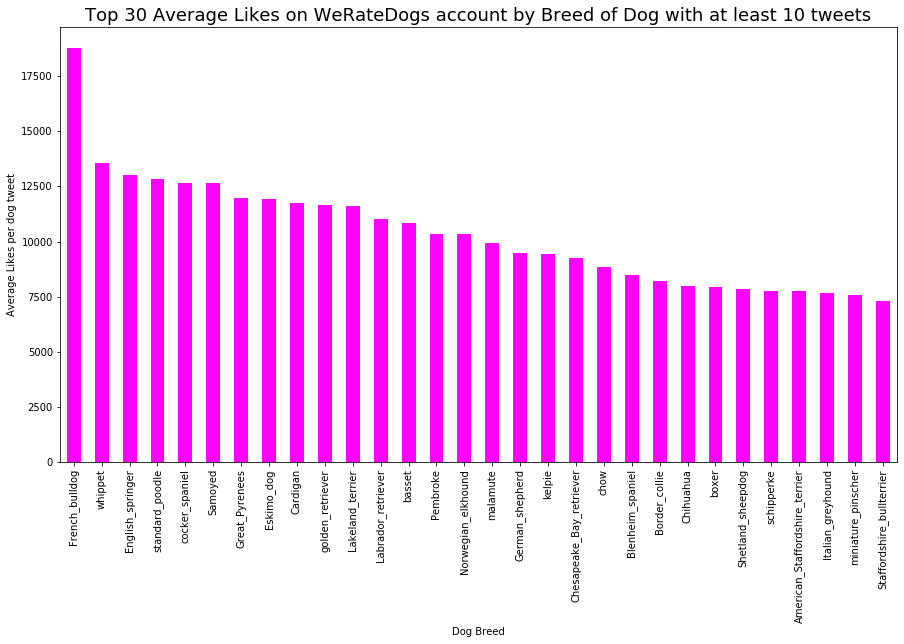

In [289]:
# plotting fraph for the top 30 breeds
fig = plt.figure(figsize=(15,8))
final_clean_count_2.sort_values(ascending=False).nlargest(30).plot(kind='bar',color='magenta')
plt.title("Top 30 Average Likes on WeRateDogs account by Breed of Dog with at least 10 tweets",fontsize=18)
plt.ylabel("Average Likes per dog tweet")
plt.xlabel("Dog Breed");

> **French_Bulldog is most liked dog breed , because of their cuteness, they attracts**



### Conclusion

These are some few breed we get from WeRatedDogs twitter profile , we can know do more reserch on these breeds , about their habit plan, foods, needs. 

### Sources

Udacity materials


Udacity Video Lectures


https://pandas.pydata.org/pandas-docs/version/0.18/generated/pandas.Series.apply.html
https://stackoverflow.com/questions/37428218/how-to-properly-apply-a-lambda-function-into-a-pandas-data-frame-column
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html